<a href="https://colab.research.google.com/github/jjyjung/ai/blob/gh-pages/tf_keras_DNN_BMI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Jupyter Notebook에서 실행시킬 때에는 아래 2개 셀 대신에 이 코드를 실행하세요.
# import numpy as np
# import pandas as pd
# import tensorflow as tf
# from tensorflow.keras import layers  # 모듈(변수나 함수를 포함)만 불러오기

# # BMI 데이터를 읽어 들이고 정규화하기
# dir = "./ai/"  # 현재 경로에 bmi.csv가 저장되어 있다고 가정함
# df = pd.read_csv(dir + "bmi.csv")    ### [중요!!] https://github.com/jjyjung/ai/blob/gh-pages/bmi.csv 에서 다운받을 수 있습니다.

In [1]:
### Colab에서 Google Drive에 접근할 때만 필요한 코드
from google.colab import drive

drive.mount('/content/gdrive')   # google drive를 google colab에 연결. 처음 실행 시, 인증 필요

Mounted at /content/gdrive


In [2]:
### Colab에서 Google Drive에 저장된 파일에 접근할 때 필요한 코드
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers  # 모듈(변수나 함수를 포함)만 불러오기

# BMI 데이터를 읽어 들이고 정규화하기
dir = "/content/gdrive/My Drive/Colab Notebooks/ai/"  ### [중요!!] Colab의 경우, bmi.csv를 저장할 위치를 기록하시오.
df = pd.read_csv(dir + "bmi.csv")    ### [중요!!] https://github.com/jjyjung/ai/blob/gh-pages/bmi.csv 에서 다운받을 수 있습니다.

In [3]:
df

,height,weight,label
0,142,62,fat
1,142,73,fat
2,177,61,normal
3,187,48,thin
4,153,60,fat
...,...,...,...
19995,122,58,fat
19996,193,69,normal
19997,193,37,thin
19998,195,51,thin


In [4]:
# 몸무게와 키 데이터 약식 정규화
df["weight"] /= 100   # normalization
df["height"] /= 200   # normalization
# X = df[["weight", "height"]].to_numpy()
X = df.iloc[:,0:2]

# 레이블링, 라벨링 (labelling) => one-hot encoding
bclass = {"thin":[1,0,0], "normal":[0,1,0], "fat":[0,0,1]}
y = np.empty((20000,3))     # 2000x3 크기의 다차원 벡터 생성
for i, v in enumerate(df["label"]):
    y[i] = bclass[v]        # "thin'이면, y[i]=[1,0,0] 와 같이 할당

# 훈련 전용 데이터와 테스트 전용 데이터로 나누기
X_train, y_train = X[0:15000], y[0:15000]
X_test,  y_test  = X[15000:20000], y[15000:20000]

In [29]:
# 모델 구조 정의하기
model = tf.keras.Sequential()         # 순차적 계층화 준비
model.add(layers.Dense(8, input_shape=(2,)))  # 입력 2개로부터 전달받는 8개 노드의 layer 생성
model.add(layers.Activation('relu'))  # ReLU 활성화함수 채택
model.add(layers.Dropout(0.1))        # dropout ratio=10% (배치 훈련시 10% arc 무시)

model.add(layers.Dense(4))            # 4개 노드의 layer 생성
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(3))
model.add(layers.Activation('softmax'))# 분류(classification)을 위해 softmax 함수 사용

# 모델 구축하기
model.compile(
    loss='categorical_crossentropy',  # 다중 교차엔트로피
    optimizer='rmsprop',   # 최적화 기법 중 하나 (tf.keras.optimizers.RMSprop(learning_rate=0.1)
    metrics=['accuracy',tf.keras.metrics.TruePositives(name='tp'), tf.keras.metrics.Precision(), tf.keras.metrics.AUC()])

In [6]:
# 데이터 훈련하기
hist = model.fit(
    X_train, y_train,
    batch_size=100,     # 100개에 한 번씩 업데이터 실행
    epochs=5,          # 훈련 데이터셋을 총 60회 반복 실험. 단, 조기중지될 수 있음
    validation_split=0.2,
        #validation data 분할 비율. 즉, 15000개 중에서 10%인 1500개를 validation용으로 분할
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)],
        #'val_loss'를 monitor하여 감소하면 한 번 더 참고 조기중지
    verbose=1)   # 전 과정을 화면에 출력(1) 또는 미출력(0) 모드

# 테스트 데이터로 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Epoch 1/5
120/120 [==============================] - 1s 4ms/step - loss: 1.1021 - accuracy: 0.3493 - tp: 0.0000e+00 - precision: 0.0000e+00 - auc: 0.5128 - val_loss: 1.1011 - val_accuracy: 0.3210 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.5028
Epoch 2/5
120/120 [==============================] - 0s 2ms/step - loss: 1.1000 - accuracy: 0.3608 - tp: 0.0000e+00 - precision: 0.0000e+00 - auc: 0.5214 - val_loss: 1.1032 - val_accuracy: 0.3210 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.4787
Epoch 3/5
120/120 [==============================] - 0s 2ms/step - loss: 1.1001 - accuracy: 0.3537 - tp: 0.0000e+00 - precision: 0.0000e+00 - auc: 0.5196 - val_loss: 1.1035 - val_accuracy: 0.3637 - val_tp: 0.0000e+00 - val_precision: 0.0000e+00 - val_auc: 0.5242
Epoch 4/5
120/120 [==============================] - 0s 2ms/step - loss: 1.0989 - accuracy: 0.3542 - tp: 0.0000e+00 - precision: 0.0000e+00 - auc: 0.5248 - val_loss: 1.0991 - val_accuracy: 0.3637 - val_tp: 0.000

In [8]:
score

[1.0998278856277466, 0.3073999881744385, 0.0, 0.0, 0.491599977016449]

In [7]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'tp', 'precision', 'auc', 'val_loss', 'val_accuracy', 'val_tp', 'val_precision', 'val_auc'])

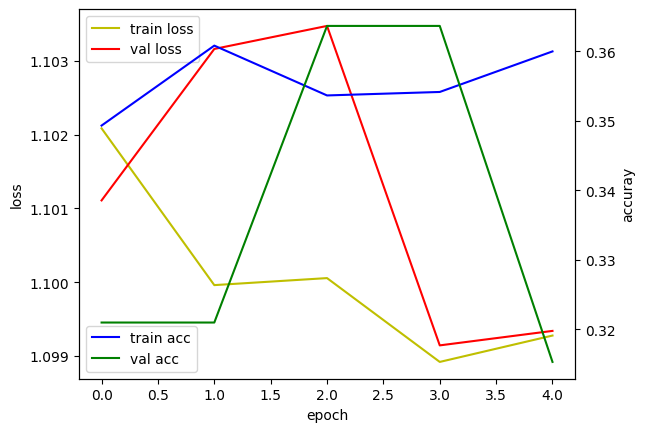

In [9]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None, 3)                 1

In [11]:
model.get_weights()

[array([[ 3.2715169e-01, -3.4482247e-01, -7.4045002e-01, -3.0964091e-01,
         -1.2861955e-01,  2.7596086e-02, -3.8553417e-02,  6.8964154e-01],
        [-2.3081395e-01,  2.4258617e-01, -2.1379292e-02, -2.6681918e-01,
         -7.8784108e-02, -9.7168112e-01, -5.9449673e-04, -8.5842007e-01]],
       dtype=float32),
 array([-0.31616968, -0.31416002,  0.        , -0.31617743,  0.        ,
        -0.30000278,  0.        ,  0.38841546], dtype=float32),
 array([[-0.40148413, -0.4929608 , -0.47902355,  0.23552594],
        [ 0.14578047,  0.40665656,  0.89342076,  0.15644607],
        [ 0.04699308,  0.11152917, -0.6005113 , -0.08063823],
        [-0.39043134,  0.46970448, -0.03107958,  0.41292608],
        [ 0.5505838 , -0.10116476,  0.5974106 , -0.5177656 ],
        [ 0.43377262,  0.67394334,  0.25912082, -0.05377947],
        [ 0.4137084 , -0.5638203 ,  0.337892  ,  0.30865735],
        [-0.17327732, -0.67737377, -0.00184083,  0.2260912 ]],
       dtype=float32),
 array([-0.31533572, -0.0

In [28]:
model.save(dir+"dnn_bmi")
print("Saved model to disk.")

from numpy import loadtxt
from tensorflow.python.keras.models import load_model

# 저장된 모델 읽어오기
loaded_model = load_model(dir+"dnn_bmi", compile=False)
model.summary()

# 모델을 평가하기
score = model.evaluate(X_test, y_test)
print('test_loss: ', score[0])
print('test_acc: ', score[1])

Saved model to disk.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 24        
                                                                 
 activation (Activation)     (None, 8)                 0         
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 4)                 36        
                                                                 
 activation_1 (Activation)   (None, 4)                 0         
                                                                 
 dropout_1 (Dropout)         (None, 4)                 0         
                                                                 
 dense_2 (Dense)             (None,

In [14]:
# X_test 샘플들의 클래스 예측하기
y_prob = model.predict(X_test)    # X_test의 출력값 확인하기
print(y_prob)

y_class = y_prob.argmax(axis=-1)  # X_test의 클래스 예측하기
y_class

157/157 [==============================] - 0s 805us/step
[[0.31591585 0.34837887 0.33570522]
 [0.31591585 0.34837887 0.33570522]
 [0.31591585 0.34837887 0.33570522]
 ...
 [0.31591585 0.34837887 0.33570522]
 [0.31591585 0.34837887 0.33570522]
 [0.31591585 0.34837887 0.33570522]]


array([1, 1, 1, ..., 1, 1, 1])

In [15]:
# 새로운 샘플의 클래스 예측하기
X_new = [80, 175]
X_new[0]/=100; X_new[1]/=200
print(X_new)

y_prob = model.predict([X_new]) # X_new의 출력값 확인하기
y_pred = y_prob.argmax()        # X_new의 클래스 예측하기
print(y_prob, y_pred)

[0.8, 0.875]
1/1 [==============================] - 0s 76ms/step
[[0.31591585 0.34837887 0.33570522]] 1


In [16]:
type(X_test)

pandas.core.frame.DataFrame

In [17]:
X_test.head()

,height,weight
15000,0.690,0.55
15001,0.760,0.36
15002,0.915,0.72
15003,0.990,0.51
15004,0.745,0.47


In [18]:
X_test.head(5).index.tolist()

[15000, 15001, 15002, 15003, 15004]

In [19]:
X_test0 = X_test.loc[15000]
print(X_test0); print()

X_test_li = list(X_test0)
y_prob = model.predict([X_test_li])  # model.predict([[0.69, 0.55]])
y_pred = y_prob.argmax()
print(y_prob, y_pred)

height    0.69
weight    0.55
Name: 15000, dtype: float64

1/1 [==============================] - 0s 39ms/step
[[0.31591585 0.34837887 0.33570522]] 1


In [20]:
def predict_bmi(X_new):
  y_prob = model.predict([X_new])
  y_pred = y_prob.argmax()
  print(X_new, y_prob, y_pred, sep='\t')

In [21]:
X_mean = [X_train["height"].mean(), X_train["weight"].mean()]
X_min = [X_train["height"].min(), X_train["weight"].min()]
X_max = [X_train["height"].max(), X_train["weight"].max()]
X_min_max = [X_train["height"].min(), X_train["weight"].max()]
X_max_min = [X_train["height"].max(), X_train["weight"].min()]

predict_bmi(X_mean)
predict_bmi(X_min)
predict_bmi(X_max)
predict_bmi(X_min_max)
predict_bmi(X_max_min)

1/1 [==============================] - 0s 36ms/step
[0.7999703333333333, 0.5757626666666668]	[[0.31591585 0.34837887 0.33570522]]	1
1/1 [==============================] - 0s 37ms/step
[0.6, 0.35]	[[0.31591585 0.34837887 0.33570522]]	1
1/1 [==============================] - 0s 39ms/step
[1.0, 0.8]	[[0.31591585 0.34837887 0.33570522]]	1
1/1 [==============================] - 0s 38ms/step
[0.6, 0.8]	[[0.31591585 0.34837887 0.33570522]]	1
1/1 [==============================] - 0s 40ms/step
[1.0, 0.35]	[[0.31591585 0.34837887 0.33570522]]	1
